In [154]:
from urllib.request import urlopen

# открываю текст по url
html = urlopen("https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher's%20Stone.txt")

In [155]:
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

# составляю словарь частот, предварительно приведя строчки в норм состояние
text = " ".join([re.sub('\W+', " ", line.decode("utf-8")) for line in html])
tokenizedWords = nltk.tokenize.word_tokenize(text)
freq = nltk.FreqDist(tokenizedWords)

# нормализованный словарь частот, кэш для оптимизации
# пришлось использовать nltk-шный морфологический анализатор,
# потому что нормально выкачивать txt из интернета можно только на англе
dictCache = {}
wordnet_lemmatizer = WordNetLemmatizer()
def norm(word):
    if word in dictCache:
        return dictCache[word]
    dictCache[word] = wordnet_lemmatizer.lemmatize(word)
    return dictCache[word]

freq_norm = nltk.FreqDist([norm(word) for word in tokenizedWords])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krendeleno\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\krendeleno\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\krendeleno\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [156]:
import math
from matplotlib import pyplot as pp

def graph(freq_list):
    pp.plot([math.log(i) for i in range(1, len(freq_list) + 1)], [math.log(freq_list[i]) for i in freq_list], '.')

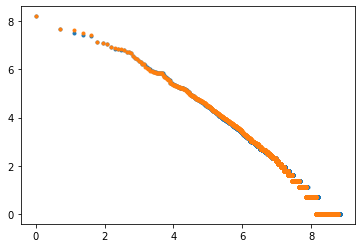

In [157]:
# рисую графики, решила что лучше на одном рисунке чтобы заметнее различие
graph(freq)
graph(freq_norm)

